<a href="https://colab.research.google.com/github/manasik29/Simple-Linear-Regression/blob/main/The_Waist_Circumference_Adipose_Tissue.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***1. Load Data***

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('/content/WC_AT.csv')

In [3]:
data.head()

,Waist,AT
0,74.75,25.72
1,72.60,25.89
2,81.80,42.60
3,83.95,42.80
4,74.65,29.84


In [4]:
data.tail()

,Waist,AT
104,100.1,124.0
105,93.3,62.2
106,101.8,133.0
107,107.9,208.0
108,108.5,208.0


***2. EDA***

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109 entries, 0 to 108
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Waist   109 non-null    float64
 1   AT      109 non-null    float64
dtypes: float64(2)
memory usage: 1.8 KB


In [6]:
#correlation coef
data.corr()

,Waist,AT
Waist,1.000000,0.818558
AT,0.818558,1.000000


In [7]:
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


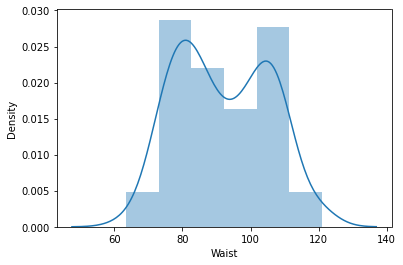

In [9]:
#distplot
sns.distplot(data.Waist)

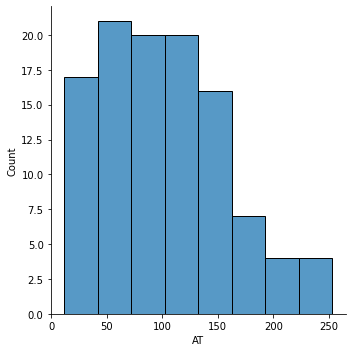

In [10]:
sns.displot(data.AT)

***3. Fitting a Linear Regression equation***

In [11]:
import statsmodels.formula.api as smf

In [13]:
model = smf.ols("AT~Waist", data = data).fit()

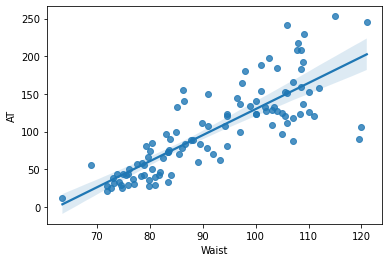

In [14]:
sns.regplot(x  = "Waist", y = 'AT', data= data)

***4. Model Parameters***

In [16]:
#coefficients
model.params

Intercept   -215.981488
Waist          3.458859
dtype: float64

In [18]:
#t-values and p-values
print(model.tvalues, '\n',model.pvalues)

Intercept    -9.909103
Waist        14.740376
dtype: float64 
 Intercept    8.197416e-17
Waist        1.618607e-27
dtype: float64


In [19]:
#R squared values
model.rsquared

0.670036893052843

***5. Prediction***

In [20]:
#Predict AT for Waist = 65,150,40
newdata = pd.Series([65,150,40])

In [23]:
data_pred = pd.DataFrame(newdata, columns = ['Waist'])

In [24]:
data_pred

,Waist
0,65
1,150
2,40


In [26]:
model.predict(data_pred)

0      8.844373
1    302.847421
2    -77.627112
dtype: float64

In [28]:
data.describe()

,Waist,AT
count,109.000000,109.000000
mean,91.901835,101.894037
std,13.559116,57.294763
min,63.500000,11.440000
25%,80.000000,50.880000
50%,90.800000,96.540000
75%,104.000000,137.000000
max,121.000000,253.000000


As the AT cannot be negative, so we will have to ask the person with WC = 40, to have a CT Scan and what AT we will get from there we will add the observation to data so, range of WC will be [40,121].

And hence we can build a new regression model with new data points.